#Main Data PreProcessing

In [ ]:

import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
#---------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
#---------------------------------------
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
#---------------------------------------
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
#---------------------------------------
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
import pathlib
from tensorflow.keras.utils import image_dataset_from_directory
from sklearn.preprocessing import LabelEncoder
#----------------------------------------
import warnings
warnings.filterwarnings("ignore")
#import drive
from google.colab import drive
drive.mount('/content/drive')
print ('modules loaded')

Mounted at /content/drive
modules loaded


In [ ]:
batch_size = 32
img_size = (224, 224)
train_dataset = image_dataset_from_directory(directory = "/content/drive/MyDrive/brain_tumor/Training",
                                       labels = "inferred",
                                       label_mode="categorical",
                                       color_mode = "rgb",
                                       batch_size = 32,
                                       image_size = img_size,
                                       shuffle = True,
                                       validation_split = 0.2,
                                       subset = "training",
                                       seed = 30,
                                      )
val_dataset = image_dataset_from_directory(directory = "/content/drive/MyDrive/brain_tumor/Training",
                                           labels = "inferred",
                                           label_mode="categorical",
                                           color_mode = "rgb",
                                           batch_size = 32,
                                           image_size = img_size,
                                           shuffle = True,
                                           validation_split = 0.2,
                                           subset = "validation",
                                           seed = 30,
                                           )

test_dataset = image_dataset_from_directory(directory = "/content/drive/MyDrive/brain_tumor/Testing",
                                            labels = "inferred",
                                            label_mode="categorical",
                                            color_mode = "rgb",
                                            image_size = img_size,
                                            shuffle = False
                                            )


Found 3216 files belonging to 4 classes.
Using 2573 files for training.
Found 3216 files belonging to 4 classes.
Using 643 files for validation.
Found 1311 files belonging to 4 classes.


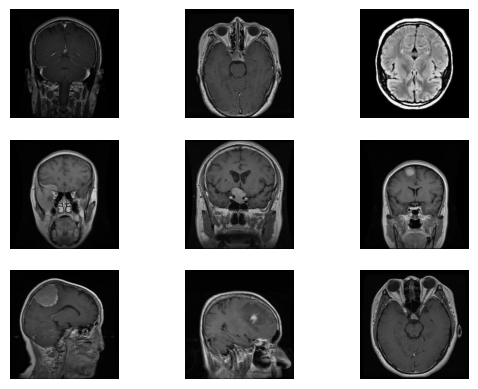

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

for images, label in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy()/255)
        plt.axis("off")


In [ ]:
class_names = train_dataset.class_names
num_classes = len(class_names)
print("Class names:", class_names)

Class names: ['glioma', 'meningioma', 'notumor', 'pituitary']


In [ ]:
for images, labels in train_dataset.take(1):
    print("Shape of one-hot encoded labels:", labels.shape)
    print("Example of one-hot encoded labels for the first batch:")
    print(labels.numpy())

Shape of one-hot encoded labels: (32, 4)
Example of one-hot encoded labels for the first batch:
[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]


#FeedForward

In [ ]:
img_shape=(224,224,3)
class_count=4
model = models.Sequential([
    layers.Flatten(input_shape=img_shape),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(class_count, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

hist = model.fit(train_dataset, validation_data=val_dataset, epochs=10)



Epoch 1/10
143/143 [==============================] - 358s 2s/step - loss: 1142.5983 - accuracy: 0.5534 - val_loss: 422.6734 - val_accuracy: 0.5193
Epoch 2/10
143/143 [==============================] - 245s 2s/step - loss: 177.9229 - accuracy: 0.6724 - val_loss: 119.1193 - val_accuracy: 0.6725
Epoch 3/10
143/143 [==============================] - 240s 2s/step - loss: 62.1723 - accuracy: 0.7595 - val_loss: 43.8204 - val_accuracy: 0.7688
Epoch 4/10
143/143 [==============================] - 254s 2s/step - loss: 32.2456 - accuracy: 0.7928 - val_loss: 44.7482 - val_accuracy: 0.7636
Epoch 5/10
143/143 [==============================] - 242s 2s/step - loss: 48.2584 - accuracy: 0.7438 - val_loss: 54.4375 - val_accuracy: 0.7881
Epoch 6/10
143/143 [==============================] - 236s 2s/step - loss: 32.6972 - accuracy: 0.7803 - val_loss: 41.3253 - val_accuracy: 0.7294
Epoch 7/10
143/143 [==============================] - 236s 2s/step - loss: 21.2161 - accuracy: 0.8046 - val_loss: 33.9304 - v

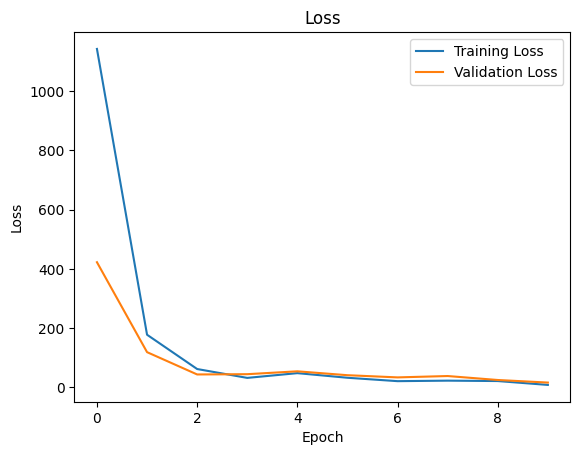

In [ ]:
import matplotlib.pyplot as plt

# Plot training loss
plt.plot(hist.history['loss'], label='Training Loss')

# Plot validation loss
plt.plot(hist.history['val_loss'], label='Validation Loss')

plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

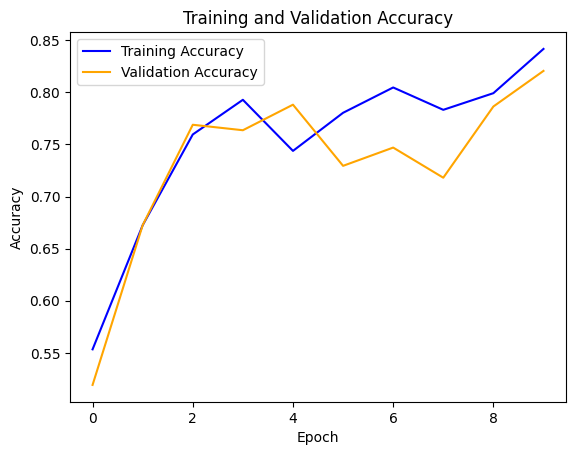

In [ ]:
import matplotlib.pyplot as plt

# Plot both training accuracy and validation accuracy on the same plot
plt.plot(hist.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy', color='orange')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
test_score = model.evaluate(test_dataset, verbose = 1)

41/41 [==============================] - 89s 2s/step - loss: 14.8670 - accuracy: 0.8040


In [ ]:
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

Test loss: 14.866999626159668
Test accuracy: 0.8039664626121521


In [ ]:
y_true = np.concatenate([ y for _ , y in test_dataset] , axis = 0)

In [ ]:
y_true = np.argmax(y_true, axis=1)
y_pred = model.predict(test_dataset)
y_pred = np.argmax(y_pred, axis=1)

41/41 [==============================] - 12s 283ms/step


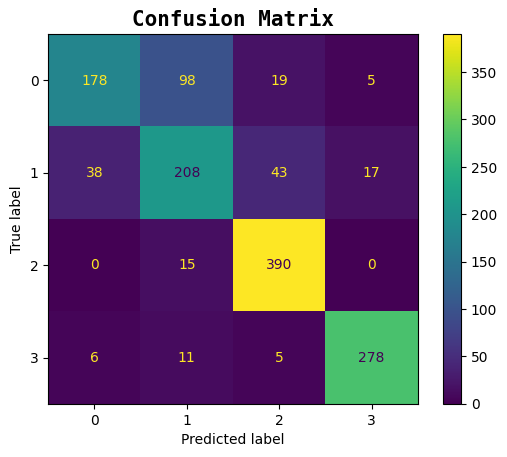

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report , ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true , y_pred)
plt.title("Confusion Matrix", fontname = "monospace", fontsize = 15, weight = "bold")
plt.show()

In [ ]:

from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.80      0.59      0.68       300
           1       0.63      0.68      0.65       306
           2       0.85      0.96      0.90       405
           3       0.93      0.93      0.93       300

    accuracy                           0.80      1311
   macro avg       0.80      0.79      0.79      1311
weighted avg       0.81      0.80      0.80      1311



#CNN


In [ ]:
CNN_Model = Sequential([
    # Convolutional layers
    Conv2D(32, (3, 3), activation='relu', input_shape=img_shape),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    # Flatten layer to transition from convolutional to fully connected layers
    Flatten(),
    # Fully connected layers
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # Output layer
])
CNN_Model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
CNN_Model.summary()
hist= CNN_Model.fit(train_dataset, validation_data=val_dataset, epochs=10)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)      

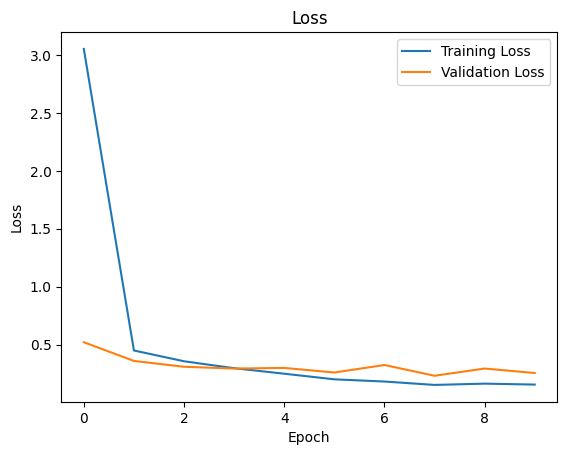

In [ ]:
import matplotlib.pyplot as plt

# Plot training loss
plt.plot(hist.history['loss'], label='Training Loss')

# Plot validation loss
plt.plot(hist.history['val_loss'], label='Validation Loss')

plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

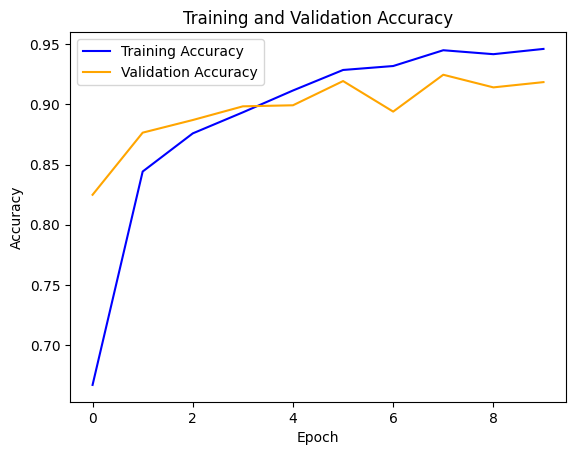

In [ ]:
import matplotlib.pyplot as plt

# Plot both training accuracy and validation accuracy on the same plot
plt.plot(hist.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy', color='orange')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
CNNtest_score = CNN_Model.evaluate(test_dataset, verbose= 1)

41/41 [==============================] - 70s 2s/step - loss: 0.2625 - accuracy: 0.9031


In [ ]:
print('Test loss:', CNNtest_score[0])
print('Test accuracy:', CNNtest_score[1])

Test loss: 0.26254966855049133
Test accuracy: 0.9031273722648621


In [ ]:
y_true = np.concatenate([ y for _ , y in test_dataset] , axis = 0)

In [ ]:
y_true = np.argmax(y_true, axis=1)
y_pred = CNN_Model.predict(test_dataset)
y_pred = np.argmax(y_pred, axis=1)

41/41 [==============================] - 52s 1s/step


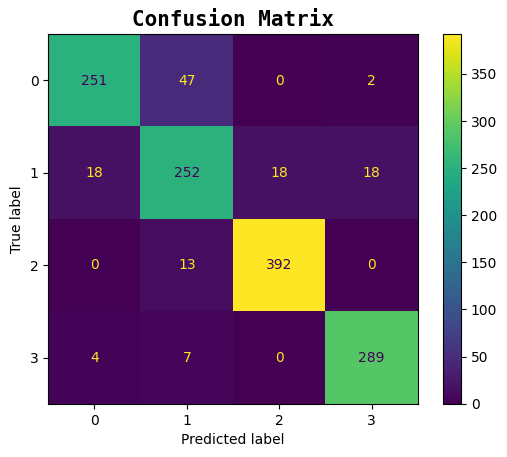

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report , ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true , y_pred)
plt.title("Confusion Matrix", fontname = "monospace", fontsize = 15, weight = "bold")
plt.show()

In [ ]:

from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.92      0.84      0.88       300
           1       0.79      0.82      0.81       306
           2       0.96      0.97      0.96       405
           3       0.94      0.96      0.95       300

    accuracy                           0.90      1311
   macro avg       0.90      0.90      0.90      1311
weighted avg       0.90      0.90      0.90      1311



#VGG 16 PreTrained


In [ ]:
# The default input size for this model is 224x224.
img_height, img_width = 224, 224
batch_size = 32

In [ ]:
vgg16_model = Sequential()
pretrained_model = tf.keras.applications.VGG16(include_top=False,
                                                  input_shape=(img_height, img_width, 3),
                                                  pooling='max',
                                                  weights='imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False
vgg16_model.add(pretrained_model)
vgg16_model.add(layers.Flatten())
vgg16_model.add(layers.Dense(512, activation='relu'))
vgg16_model.add(layers.Dense(4, activation='softmax'))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# Compile and train the model
vgg16_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = vgg16_model.fit(train_dataset, validation_data=val_dataset, epochs=10)

Epoch 1/10
81/81 [==============================] - 486s 6s/step - loss: 8.8847 - accuracy: 0.6856 - val_loss: 2.2183 - val_accuracy: 0.8009
Epoch 2/10
81/81 [==============================] - 15s 178ms/step - loss: 1.3321 - accuracy: 0.8601 - val_loss: 1.0321 - val_accuracy: 0.8616
Epoch 3/10
81/81 [==============================] - 18s 209ms/step - loss: 0.6816 - accuracy: 0.8997 - val_loss: 0.9588 - val_accuracy: 0.8725
Epoch 4/10
81/81 [==============================] - 17s 191ms/step - loss: 0.6015 - accuracy: 0.9048 - val_loss: 0.8768 - val_accuracy: 0.8974
Epoch 5/10
81/81 [==============================] - 16s 186ms/step - loss: 0.4245 - accuracy: 0.9230 - val_loss: 1.9171 - val_accuracy: 0.8274
Epoch 6/10
81/81 [==============================] - 16s 184ms/step - loss: 0.2760 - accuracy: 0.9483 - val_loss: 0.6491 - val_accuracy: 0.9176
Epoch 7/10
81/81 [==============================] - 16s 188ms/step - loss: 0.2024 - accuracy: 0.9580 - val_loss: 1.1548 - val_accuracy: 0.8647
E

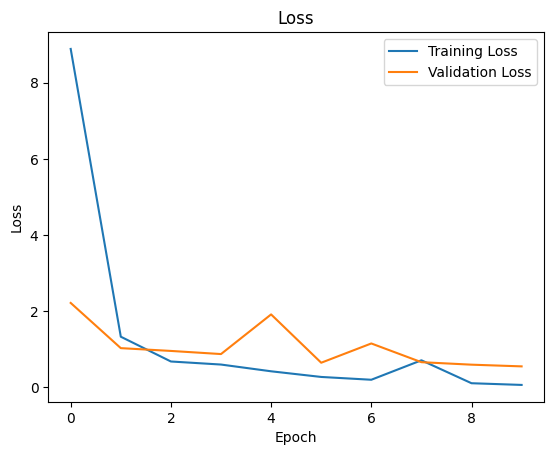

In [ ]:
import matplotlib.pyplot as plt

# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')

# Plot validation loss
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

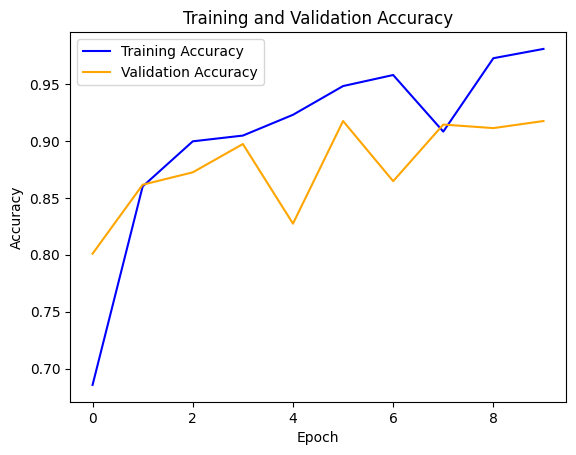

In [ ]:
import matplotlib.pyplot as plt

# Plot both training accuracy and validation accuracy on the same plot
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
score = vgg16_model.evaluate(test_dataset, verbose = 1)

41/41 [==============================] - 275s 7s/step - loss: 0.8678 - accuracy: 0.9016


In [ ]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8678469061851501
Test accuracy: 0.9016018509864807


In [ ]:
y_true = np.concatenate([ y for _ , y in test_dataset] , axis = 0)

In [ ]:
y_true = np.argmax(y_true, axis=1)
y_pred = vgg16_model.predict(test_dataset)
y_pred = np.argmax(y_pred, axis=1)

41/41 [==============================] - 5s 128ms/step


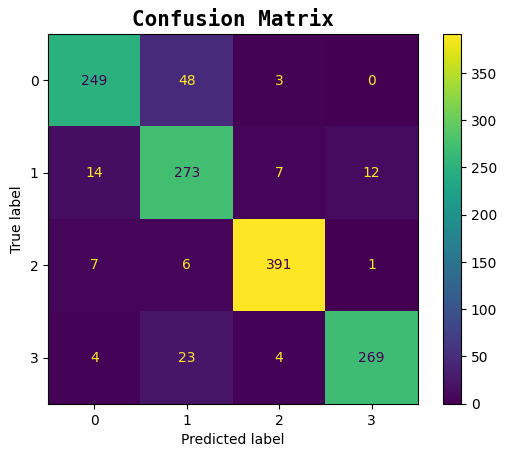

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report , ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true , y_pred)
plt.title("Confusion Matrix", fontname = "monospace", fontsize = 15, weight = "bold")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.83      0.87       300
           1       0.78      0.89      0.83       306
           2       0.97      0.97      0.97       405
           3       0.95      0.90      0.92       300

    accuracy                           0.90      1311
   macro avg       0.90      0.90      0.90      1311
weighted avg       0.91      0.90      0.90      1311



#ResNet 50

In [ ]:
# Define the image size and batch size
img_height, img_width = 224, 224
batch_size = 32

In [ ]:
# Create the ResNet50 model and set the layers to be non-trainable
resnet_model = Sequential()
pretrained_model = tf.keras.applications.ResNet50(include_top=False,
                                                  input_shape=(img_height, img_width, 3),
                                                  pooling='max',
                                                  weights='imagenet')

for layer in pretrained_model.layers:
    layer.trainable = False
resnet_model.add(pretrained_model)
resnet_model.add(layers.Flatten())
resnet_model.add(layers.Dense(512, activation='relu'))
resnet_model.add(layers.Dense(4, activation='softmax'))

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
# Compile and train the model
resnet_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = resnet_model.fit(train_dataset, validation_data=val_dataset, epochs=10)

Epoch 1/10
81/81 [==============================] - 23s 202ms/step - loss: 5.5747 - accuracy: 0.6836 - val_loss: 0.4003 - val_accuracy: 0.8647
Epoch 2/10
81/81 [==============================] - 14s 161ms/step - loss: 0.3689 - accuracy: 0.8694 - val_loss: 0.3149 - val_accuracy: 0.8771
Epoch 3/10
81/81 [==============================] - 14s 167ms/step - loss: 0.1986 - accuracy: 0.9281 - val_loss: 0.2669 - val_accuracy: 0.8942
Epoch 4/10
81/81 [==============================] - 14s 167ms/step - loss: 0.1802 - accuracy: 0.9281 - val_loss: 0.2188 - val_accuracy: 0.9067
Epoch 5/10
81/81 [==============================] - 16s 191ms/step - loss: 0.1149 - accuracy: 0.9584 - val_loss: 0.2938 - val_accuracy: 0.8942
Epoch 6/10
81/81 [==============================] - 16s 180ms/step - loss: 0.1064 - accuracy: 0.9611 - val_loss: 0.1905 - val_accuracy: 0.9285
Epoch 7/10
81/81 [==============================] - 19s 223ms/step - loss: 0.0690 - accuracy: 0.9775 - val_loss: 0.2266 - val_accuracy: 0.9082

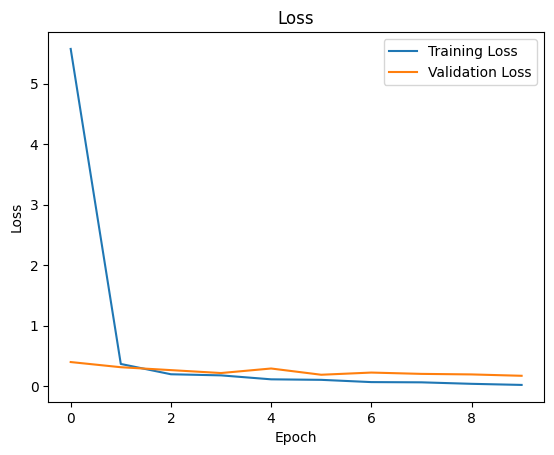

In [ ]:
import matplotlib.pyplot as plt

# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')

# Plot validation loss
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


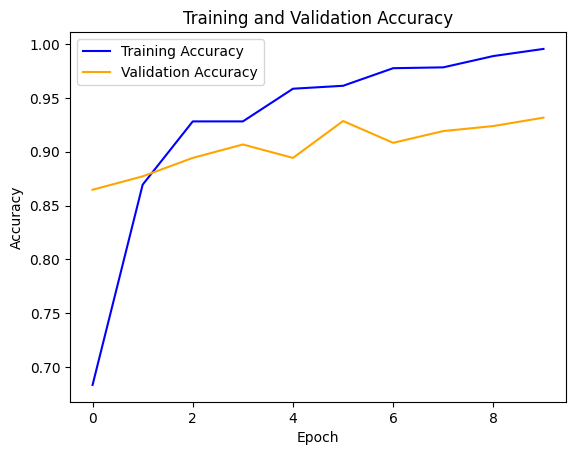

In [ ]:
import matplotlib.pyplot as plt

# Plot both training accuracy and validation accuracy on the same plot
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



In [ ]:
score = resnet_model.evaluate(test_dataset, verbose = 1)

41/41 [==============================] - 8s 182ms/step - loss: 0.2094 - accuracy: 0.9283


In [ ]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.20942151546478271
Test accuracy: 0.9282990097999573


In [ ]:
y_true = np.concatenate([ y for _ , y in test_dataset] , axis = 0)

In [ ]:
y_true = np.argmax(y_true, axis=1)
y_pred = resnet_model.predict(test_dataset)
y_pred = np.argmax(y_pred, axis=1)

41/41 [==============================] - 6s 121ms/step


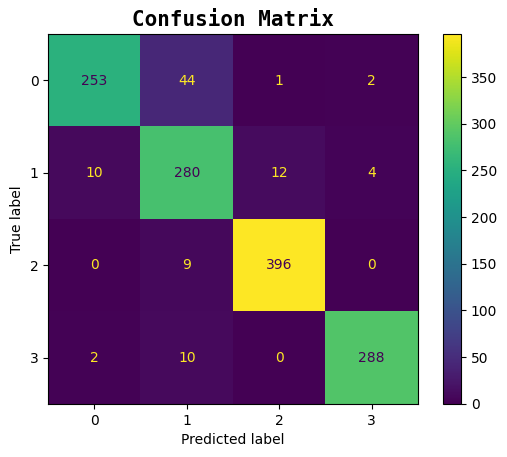

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report , ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true , y_pred)
plt.title("Confusion Matrix", fontname = "monospace", fontsize = 15, weight = "bold")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.84      0.90       300
           1       0.82      0.92      0.86       306
           2       0.97      0.98      0.97       405
           3       0.98      0.96      0.97       300

    accuracy                           0.93      1311
   macro avg       0.93      0.92      0.93      1311
weighted avg       0.93      0.93      0.93      1311



# InceptionV3

In [ ]:
imgsize=(224,224,3)
InceptionV33 = Sequential()
pretrained_model = tf.keras.applications.InceptionV3(include_top=False,
                                                  input_shape=imgsize,
                                                  pooling='max',
                                                  weights='imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False
InceptionV33.add(pretrained_model)
InceptionV33.add(layers.Flatten())
InceptionV33.add(layers.Dense(512, activation='relu'))
InceptionV33.add(layers.Dense(4, activation='softmax'))

InceptionV33.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = InceptionV33.fit(train_dataset, validation_data=val_dataset, epochs=10)

Epoch 1/10
81/81 [==============================] - 23s 198ms/step - loss: 29.1132 - accuracy: 0.5002 - val_loss: 3.8720 - val_accuracy: 0.5816
Epoch 2/10
81/81 [==============================] - 13s 156ms/step - loss: 2.6657 - accuracy: 0.6731 - val_loss: 2.5418 - val_accuracy: 0.6998
Epoch 3/10
81/81 [==============================] - 14s 158ms/step - loss: 2.4166 - accuracy: 0.7140 - val_loss: 2.4046 - val_accuracy: 0.6952
Epoch 4/10
81/81 [==============================] - 14s 160ms/step - loss: 2.4530 - accuracy: 0.7248 - val_loss: 3.9266 - val_accuracy: 0.6221
Epoch 5/10
81/81 [==============================] - 14s 161ms/step - loss: 1.8822 - accuracy: 0.7567 - val_loss: 6.7963 - val_accuracy: 0.5272
Epoch 6/10
81/81 [==============================] - 13s 156ms/step - loss: 1.5605 - accuracy: 0.7761 - val_loss: 1.5440 - val_accuracy: 0.7170
Epoch 7/10
81/81 [==============================] - 13s 154ms/step - loss: 0.9563 - accuracy: 0.8162 - val_loss: 1.2626 - val_accuracy: 0.776

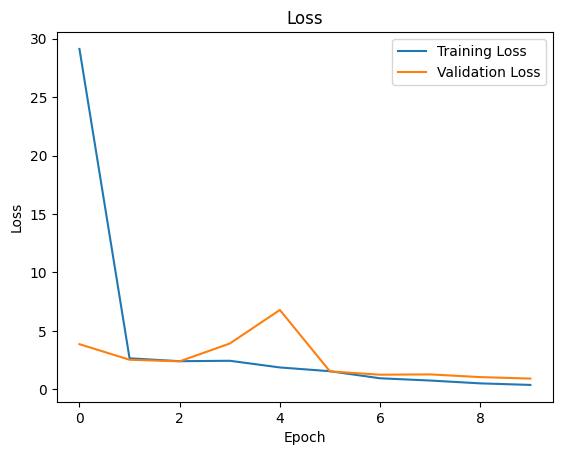

In [ ]:
import matplotlib.pyplot as plt

# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')

# Plot validation loss
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

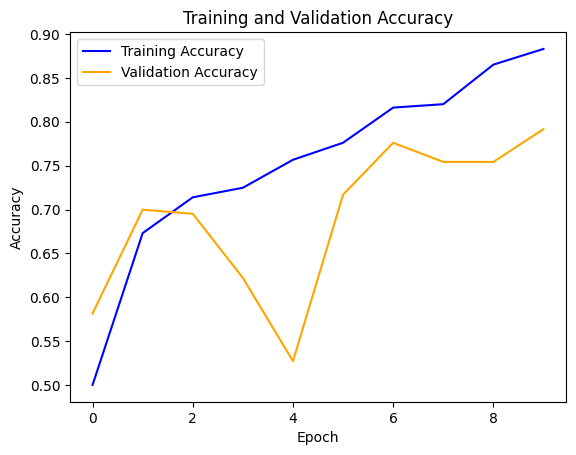

In [ ]:
import matplotlib.pyplot as plt

# Plot both training accuracy and validation accuracy on the same plot
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
score = InceptionV33.evaluate(test_dataset, verbose = 1)

41/41 [==============================] - 6s 134ms/step - loss: 1.0537 - accuracy: 0.7712


In [ ]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.0537420511245728
Test accuracy: 0.7711670398712158


In [ ]:
y_true = np.concatenate([ y for _ , y in test_dataset] , axis = 0)

In [ ]:
y_true = np.argmax(y_true, axis=1)
y_pred = InceptionV33.predict(test_dataset)
y_pred = np.argmax(y_pred, axis=1)

41/41 [==============================] - 7s 148ms/step


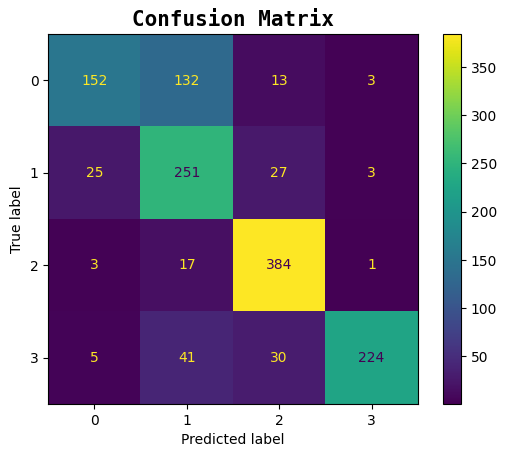

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report , ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true , y_pred)
plt.title("Confusion Matrix", fontname = "monospace", fontsize = 15, weight = "bold")
plt.show()

In [ ]:

from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.82      0.51      0.63       300
           1       0.57      0.82      0.67       306
           2       0.85      0.95      0.89       405
           3       0.97      0.75      0.84       300

    accuracy                           0.77      1311
   macro avg       0.80      0.76      0.76      1311
weighted avg       0.80      0.77      0.77      1311



# DenseNet121

In [ ]:
imgsize=(224,224,3)
DenseNet121 = Sequential()
pretrained_model = tf.keras.applications.DenseNet121(include_top=False,
                                                  input_shape=imgsize,
                                                  pooling='max',
                                                  weights='imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False
DenseNet121.add(pretrained_model)
DenseNet121.add(layers.Flatten())
DenseNet121.add(layers.Dense(512, activation='relu'))
DenseNet121.add(layers.Dense(4, activation='softmax'))

DenseNet121.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

29084464/29084464 [==============================] - 0s 0us/step


In [ ]:
history = DenseNet121.fit(train_dataset, validation_data=val_dataset, epochs=10)

Epoch 1/10
81/81 [==============================] - 33s 257ms/step - loss: 4.2629 - accuracy: 0.5974 - val_loss: 0.6696 - val_accuracy: 0.7652
Epoch 2/10
81/81 [==============================] - 14s 161ms/step - loss: 0.9083 - accuracy: 0.7583 - val_loss: 0.6218 - val_accuracy: 0.8103
Epoch 3/10
81/81 [==============================] - 14s 163ms/step - loss: 0.7048 - accuracy: 0.7995 - val_loss: 0.6089 - val_accuracy: 0.8180
Epoch 4/10
81/81 [==============================] - 15s 172ms/step - loss: 0.4678 - accuracy: 0.8500 - val_loss: 0.3970 - val_accuracy: 0.8491
Epoch 5/10
81/81 [==============================] - 17s 198ms/step - loss: 0.6786 - accuracy: 0.7975 - val_loss: 0.8114 - val_accuracy: 0.7605
Epoch 6/10
81/81 [==============================] - 15s 168ms/step - loss: 0.3914 - accuracy: 0.8815 - val_loss: 0.4452 - val_accuracy: 0.8243
Epoch 7/10
81/81 [==============================] - 17s 197ms/step - loss: 0.2684 - accuracy: 0.9059 - val_loss: 0.3440 - val_accuracy: 0.8802

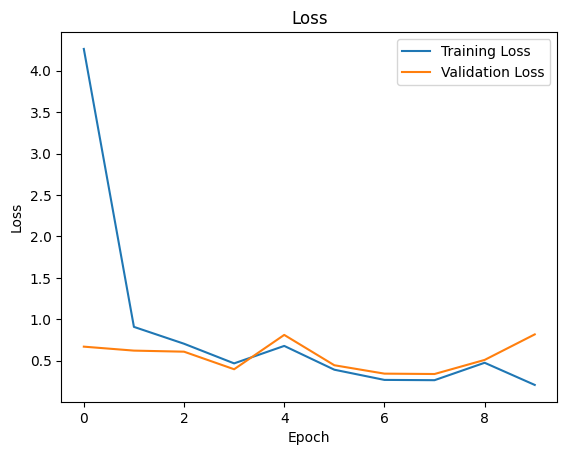

In [ ]:
import matplotlib.pyplot as plt

# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')

# Plot validation loss
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

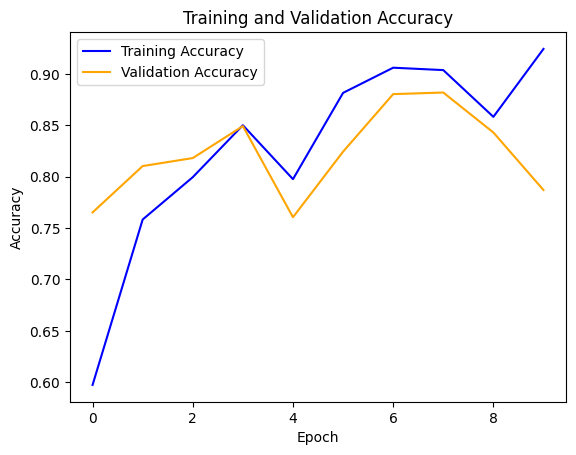

In [ ]:
import matplotlib.pyplot as plt

# Plot both training accuracy and validation accuracy on the same plot
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
score = DenseNet121.evaluate(test_dataset, verbose = 0)

In [ ]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.007033348083496
Test accuracy: 0.7536231875419617


In [ ]:
y_true = np.concatenate([ y for _ , y in test_dataset] , axis = 0)

In [ ]:
y_true = np.argmax(y_true, axis=1)
y_pred = DenseNet121.predict(test_dataset)
y_pred = np.argmax(y_pred, axis=1)

41/41 [==============================] - 8s 141ms/step


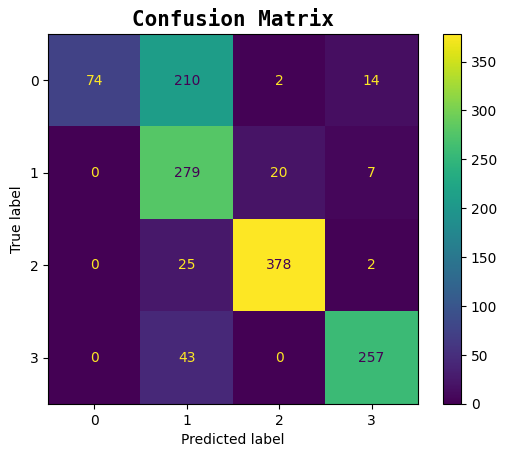

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report , ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true , y_pred)
plt.title("Confusion Matrix", fontname = "monospace", fontsize = 15, weight = "bold")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.25      0.40       300
           1       0.50      0.91      0.65       306
           2       0.94      0.93      0.94       405
           3       0.92      0.86      0.89       300

    accuracy                           0.75      1311
   macro avg       0.84      0.74      0.72      1311
weighted avg       0.85      0.75      0.73      1311

